<p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/scikit-learn-logo-small.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Introduction to Machine Learning with Scikit-learn</h1>


## **Getting started**

Many Python libraries provide reliable implementations of machine learning algorithms. One of the most popular is Scikit-learn (https://scikit-learn.org/stable/index.html), an open-source package that provides efficient implementations of a large number of machine learning methods and algorithms. 

Scikit-learn is characterized by a clean API, as well as by handy and complete online documentation. A benefit of this uniform API is that once you understand the basic use and syntax for one type of model, switching to a new model is pretty straightforward. 

A guide illustrating some of the Scikit-learn main features can be found [here](https://scikit-learn.org/stable/getting_started.html).

In this tutorial, we will learn how to use Scikit-learn to perform a very basic machine learning task involving supervised learning. Let's start!

---


# Importing Python libraries
As we saw in the Python course, it is a good practice first to import all the Python libraries that we are going to use in the script.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Download dataset

Now, let's download and have a quick look at the data we will use.


In [2]:
dataset_url = 'https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/dataset.csv'
dataset = pd.read_csv(dataset_url)
print(dataset)

     washing hands  touching face  outcome
0         8.862434      15.637931      ill
1        10.422334      15.404222      ill
2        12.462217      27.923875      ill
3        12.242321      25.734998      ill
4        12.511457      18.840600      ill
..             ...            ...      ...
195      14.613281      18.484341  healthy
196      17.811169      22.817188  healthy
197      16.425944      13.559383  healthy
198      20.922666      23.578661  healthy
199      14.923250      12.524323  healthy

[200 rows x 3 columns]


In our dataset, we have data from about 200 people telling:

*   The mean time spent washing their hands;
*   The mean number of times that they touched their face per hour;
*   And if they got a virus in the following 2 months.

From all this data, we want to develop a model that would perform a useful clinical task for us. For this development, we will apply the **machine learning workflow**.

# **Machine learning workflow**
For this tutorial, we will use the workflow presented during the theory presentation.



<center><img src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/workflow.png" width="600"></center>



The machine learning workflow tries to give us a recipe to follow when working with a machine learning project. The first step is to perform the **problem formulation**.

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/problem.png" align="left" hspace="10px" vspace="0px"></p> **Problem formulation**

First, we need to frame our machine learning problem. In this step, we need to define the features that we will use, the target variable or label that we want to predict, and finally, the machine learning task.

Give a try to create a straight forward sentence presenting our project scope by yourselves. When you are done, check our example of the framing below.



### Answer

> *Given how often people touch their own faces and how long they wash their hands, predict if they get ill in the next 2 months.*

*   Task: Classification
*   Features: Washing hand time and how many times touch the face
*   Target: Outcome in the next 2 months  


For convinience, let's store our features and targets in lists to use later.

In [3]:
features = ['washing hands', 'touching face']
targets = ['outcome']

Remember, framing your scope concisely and comprehensively is very important to guarantee that everyone involved in your project understands your goals.
For more information about this step, please, check this [material](https://developers.google.com/machine-learning/problem-framing).

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/data.png" align="left" hspace="10px" vspace="0px"></p>  **Data preparation**

In this step, we perform most of the exploratory data analyses and deal with the data's inconsistencies. As we saw in the previous course, Pandas is an excellent tool to perform this step when working with tabular data.

In our case, our dataset is already cleaned and validated for our task. Let's check how it looks like!


In [4]:
X = dataset[features].values
y = dataset[targets].values

In [27]:
print(f'Features type: {type(X)}')
print(f'Target type: {type(y)}')

print(f'Features dimensions: {X.shape}')
print(f'Target dimensions: {y.shape}')

Features type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Features dimensions: (200, 2)
Target dimensions: (200, 1)


To have more flexibility to plot some graphs, we opt to use the data in the Numpy array format. We got the data using this format using the ".values" call. By using this format, we have the following feature matrix and target vector format.

![alt text](https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/features_targets.png)

Now, let's try to visualise how our features are distributed.

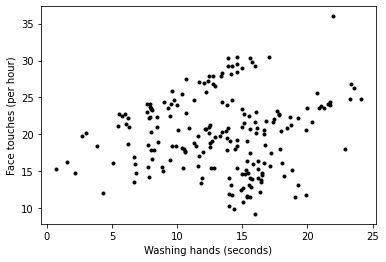

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.', color='k')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.show()

Since we are trying to perform classification, let's have a look at how the different categories are scattered in our plot.

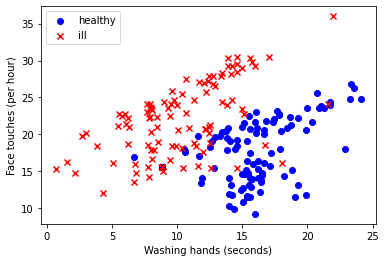

In [7]:
healthy_index = np.where(y=='healthy')
ill_index = np.where(y=='ill')

plt.scatter(X[healthy_index, 0], X[healthy_index, 1], marker='o', color='blue', label='healthy')
plt.scatter(X[ill_index, 0], X[ill_index, 1], marker='x', color='red', label='ill')
plt.xlabel('Washing hands (seconds)')
plt.ylabel('Face touches (per hour)')
plt.legend()
plt.show()

### **Splitting Your Data**
In the presentation, we introduced the idea of dividing your data set into two subsets:

*   Training set — a subset to train our model.
*   Test set — a subset to test our trained model.

**Never train on test data**. If you see surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. For example, high accuracy might indicate that test data has leaked into the training set.

Make sure never to use testing data in your training set. Fortunately, Scikit-learn provided us with a very handful function to divide our original dataset. Let's try it!

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**NOTE**: Before continue, please, check out the **Scikit-learn documentation** about the train_test_split() function in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

As a programmer, a crucial skill is to know where you can find out about how to implement what you want. Some great tools to help at this point is **Google** and the **Python library documentation** that you are working with! So let's get familiar with them! ^^

In [9]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 160
Test set size: 40


There are different ways to split your dataset. The aim of performing this step is to evaluate your machine learning models' results without the risk of having an undesired bias. Usually, the division of the data and the evaluation process is called **cross-validation**.

For more information about cross-validation:

- https://developers.google.com/machine-learning/data-prep
- https://scikit-learn.org/stable/modules/cross_validation.html

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/training.png" align="left" hspace="10px" vspace="0px"></p>   **Training model**


Training a model means learning (determining) good values for all model's parameters from labelled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss.

Loss is the penalty for a bad prediction. That is, the loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of parameters that have low loss, on average, across all examples.

### **Choosing your model**

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.

<a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">
<img src="https://scikit-learn.org/stable/_static/ml_map.png">
</a>
Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In our case, we have about 200 samples, and we are performing a classification.

Then, the recommended model is [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

Before continue, check out its documentation to get familiar with the API and examples.

To start, let's create an instance of this model.


In [10]:
clf = LinearSVC(random_state=0)

Now, we can train our model on our training set using the method ".fit()". 



In [11]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

And that is it! We trained our machine learning model.

Let's make some predictions!

## <p><img alt="Scikit-learn logo" height="45px" src="https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/figures/evaluation.png" align="left" hspace="10px" vspace="0px"></p>   **Model evaluation**

Fitting a model to some data does not entail that it will predict well on unseen data. This needs to be directly evaluated. We have just seen the train_test_split helper that splits a dataset into train and test sets, but Scikit-learn provides many other tools for model evaluation, in particular for cross-validation.


In [12]:
pred = clf.predict(X_test)

In [13]:
print(pred)

['ill' 'healthy' 'ill' 'healthy' 'healthy' 'healthy' 'ill' 'healthy'
 'healthy' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'healthy'
 'ill' 'healthy' 'ill' 'ill' 'healthy' 'ill' 'healthy' 'ill' 'ill' 'ill'
 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'ill' 'healthy'
 'healthy' 'healthy' 'healthy' 'healthy' 'healthy' 'ill']


In [14]:
print(y_test.flatten())

['ill' 'ill' 'ill' 'healthy' 'healthy' 'healthy' 'ill' 'healthy' 'healthy'
 'ill' 'ill' 'healthy' 'healthy' 'ill' 'healthy' 'healthy' 'ill' 'healthy'
 'ill' 'ill' 'healthy' 'ill' 'healthy' 'ill' 'ill' 'ill' 'ill' 'ill'
 'healthy' 'healthy' 'ill' 'ill' 'ill' 'ill' 'healthy' 'healthy' 'healthy'
 'healthy' 'healthy' 'ill']


Since it is a lot of samples being predicted, let's summarise it into some performance metrics. The Scikit-Learn offer a wide number of options of metrics. They are specific for which machine learning task we are performing. In our case, we are developing a classifier, so a commonly used metric is the accuracy. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

You can check for other metrics from Scikit-learn [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [15]:
acc = accuracy_score(y_test, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.875


Accuracy comes out to 0.825, or 82.5% (33 correct predictions out of 40 total examples from the test set). That means our classifier is doing a decent job of identifying people in risk, right?

In [16]:
clf.predict(np.array([[20,10]]))

array(['healthy'], dtype=object)

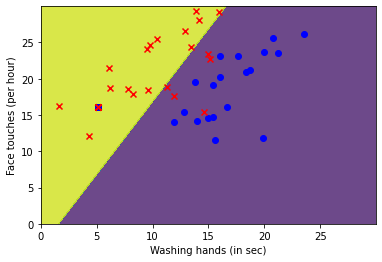

In [17]:
h = .02
cm = plt.cm.RdBu
xx, yy = np.meshgrid(np.arange(0, 30, h),
                        np.arange(0, 30, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z[Z =='ill'] = 1
Z[Z =='healthy'] = 0

plt.contourf(xx, yy, Z, alpha=.8)


healthy_index = np.where(y_test=='healthy')
ill_index = np.where(y_test=='ill')

plt.scatter(X_test[healthy_index, 0], X_test[healthy_index, 1], marker='o', color='blue', label='healthy')
plt.scatter(X_test[ill_index, 0], X_test[ill_index, 1], marker='x', color='red', label='ill')
plt.xlabel('Washing hands (in sec)')
plt.ylabel('Face touches (per hour)')
plt.show()

More information about model evaluation:
*   https://scikit-learn.org/stable/modules/model_evaluation.html
*   https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/


## **Finalising**
### **Saving model and predictions**

Finally, we save our model in a persistent format.

In [18]:
dump(clf, 'classifier.joblib') 

['classifier.joblib']



---



# Exercise 1

Read and try to implement an scaler in 

Note: fit and transform with the scaler on the training set and then just transform the test set

https://scikit-learn.org/stable/modules/preprocessing.html

In [19]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/dataset.csv')

features = ['washing hands', 'touching face']
targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature engineering
# #####################
# ADD YOUR CODE BELOW
# #####################

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #####################

clf = LinearSVC(random_state=0)
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, pred)
print(f'Model Accuracy with Feature Engineering: {acc}')

Model Accuracy with Feature Engineering: 0.925


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---



# Exercise 2

Read and try to implement using a different classification model

Note: fit and transform with the scaler on the training set and then just transform the test set

https://scikit-learn.org/stable/modules/preprocessing.html

In [20]:
# Data preparation
dataset = pd.read_csv('https://raw.githubusercontent.com/KHSDTC/Hackathon_Spring2020_Challenge/machine_learning/machine_learning/dataset.csv')

features = ['washing hands', 'touching face']
targets = ['outcome']

X = dataset[features].values
y = dataset[targets].values

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature engineering
# #####################
# ADD YOUR CODE BELOW
# #####################

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #####################

# Feature engineering
# #####################
# ADD YOUR CODE BELOW
# #####################

clf = LinearSVC(random_state=0)

# #####################

clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, pred)
print(f'Model Accuracy with Feature Engineering: {acc}')

Model Accuracy with Feature Engineering: 0.925


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Other references

*   https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb
*   https://scikit-learn.org/stable/modules/classes.html